In [120]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Imports

In [121]:
# titanic machine learning project created by kaggle

# data exploration
import pandas as pd
import numpy as np
import missingno
from collections import Counter
# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# model evaluation
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, KFold

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# remove warnings
import warnings
warnings.filterwarnings('ignore')

In [122]:
# read kaggle's datasets -> pd.read_csv('filepath')
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
ss = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
# ss = sample submission

# Data Exploration

In [123]:
# general exploration
# head = first 5 rows of dataset with all columns
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [124]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [125]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [126]:
# shape of each dataset (row,column)
print("train shape:", train.shape)
print("test shape:", test.shape)
print("ssshape :", ss.shape)

train shape: (891, 12)
test shape: (418, 11)
ssshape : (418, 2)


In [127]:
# survivors
## 0 = survived
## 1 = not survived
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

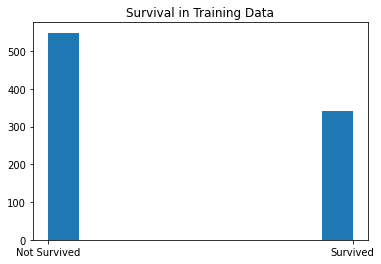

In [128]:
# visualization of survived vs not survived of training set
plt.hist(train.Survived)
plt.title('Survival in Training Data')
plt.xticks(np.arange(2), ('Not Survived', 'Survived'))
plt.show()

# Null Values (NaN)

In [129]:
# missing data by columns in train
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [130]:
# missing data by columns in test
test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [131]:
# null values in training and test are:
# Cabin, Age, Embarked, and Fare
# embarked is only missing 2 values, will replace with the majority category
# fare is only missing 1, will replace with the mean in training set

# cabin
print(train.Cabin.isnull().sum()/len(train))

# age
print(train.Age.isnull().sum()/len(train))

0.7710437710437711
0.19865319865319866


In [132]:
## ~77% of cabin data is missing, 
## ~20% of age data is missing

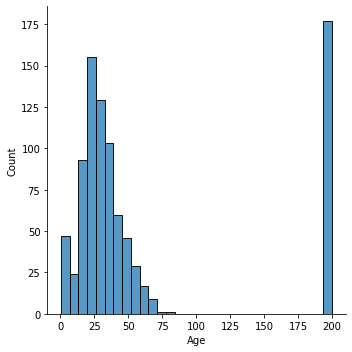

In [133]:
# visualize filling nulls with 200 in train set
sns.displot(train.Age.fillna(200))

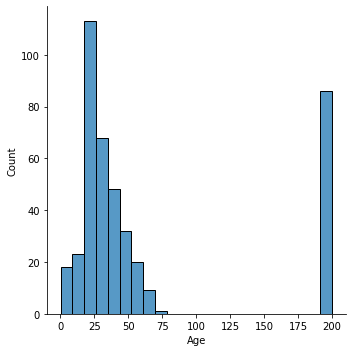

In [134]:
# visualize filling nulls with 200 in test set
sns.displot(test.Age.fillna(200))

In [135]:
# dropping and filling columns that have null values (NaN)
## drop ticket and cabin features from training and test set
train = train.drop(['Ticket', 'Cabin'], axis = 1)
test = test.drop(['Ticket', 'Cabin'], axis = 1)

In [136]:
# null values in training set 
train.isnull().sum().sort_values(ascending = False)

Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [137]:
# compute the most frequent value of Embarked in training set
mode = train['Embarked'].dropna().mode()[0]
mode

'S'

In [138]:
# fill missing value in Embarked with mode
train['Embarked'].fillna(mode, inplace = True)

In [139]:
# null values in test set
test.isnull().sum().sort_values(ascending = False)

Age            86
Fare            1
PassengerId     0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [140]:
# compute median of Fare in test set 
median = test['Fare'].dropna().median()
median

14.4542

In [141]:
# fill missing value in Fare with median
test['Fare'].fillna(median, inplace = True)

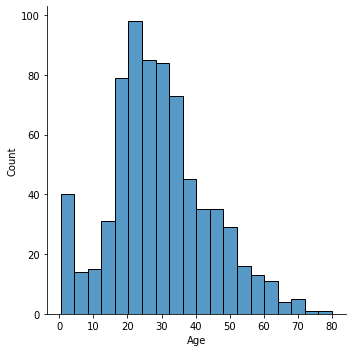

In [142]:
# distribution plot of age
sns.displot(train.Age.dropna())

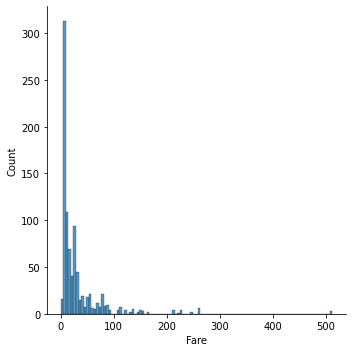

In [143]:
# distribution plot of fare
sns.displot(train.Fare.dropna())

# Summary of Stats for datasets

In [144]:
# summary statistics for training set
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [145]:
# summary statistics for test set
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.576535
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.850103
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.471875
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Analysis

In [146]:
## categorical and integer numerical
### observing the survival of people following the categorical features

# passenger class * survived
train[['Pclass', 'Survived']].groupby('Pclass').mean().sort_values(by='Survived', ascending = False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Text(0.5, 1.0, 'Survival Chance by Pclass')

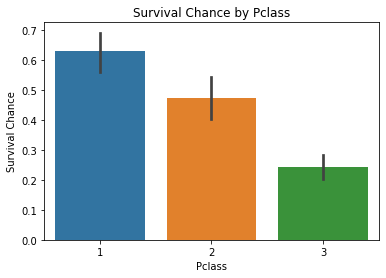

In [147]:
# visualizing survival chance by passenger class
sns.barplot(x = 'Pclass', y ='Survived', data = train)
plt.ylabel('Survival Chance')
plt.title('Survival Chance by Pclass')

In [148]:
# parent/child * survived
train[["Parch", "Survived"]].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


Text(0.5, 1.0, 'Survival Chance by Parch')

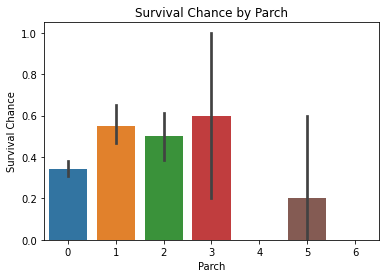

In [149]:
# visualizing survival chance by parent/child
sns.barplot(x = 'Parch', y ='Survived', data = train)
plt.ylabel('Survival Chance')
plt.title('Survival Chance by Parch')

In [150]:
# sibling/spouse * survived
train[["SibSp", "Survived"]].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


Text(0.5, 1.0, 'Survival Chance by SibSp')

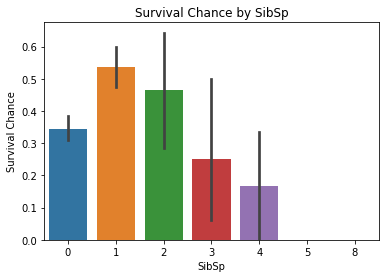

In [151]:
# visualizing survival chance by sibling/spouse
sns.barplot(x = 'SibSp', y ='Survived', data = train)
plt.ylabel('Survival Chance')
plt.title('Survival Chance by SibSp')

In [152]:
# sex * survived
train[['Sex', 'Survived']].groupby('Sex').mean().sort_values(by='Survived', ascending=False)
## women have much higher chance of survival

,Survived
Sex,
female,0.742038
male,0.188908


Text(0.5, 1.0, 'Survival Chance by Sex')

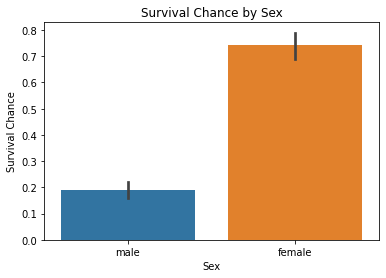

In [153]:
# visualizing survival chance by sex
sns.barplot(x = 'Sex', y ='Survived', data = train)
plt.ylabel('Survival Chance')
plt.title('Survival Chance by Sex')

In [154]:
# embarked * survived
train[['Embarked', 'Survived']].groupby('Embarked').mean().sort_values(by='Survived', ascending=False)

## higher chance of survival from people who embarked from Cherbourg
## lowest chance in Southampton

### possible there is a reason for this discrepancy

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


Text(0.5, 1.0, 'Survival Chance by Point Embarked')

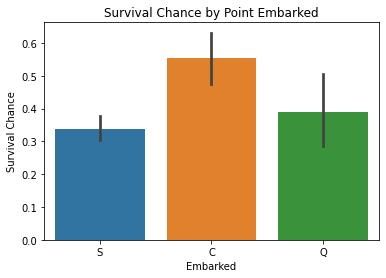

In [155]:
# visualizing survival chance by point embarked
sns.barplot(x = 'Embarked', y ='Survived', data = train)
plt.ylabel('Survival Chance')
plt.title('Survival Chance by Point Embarked')

In [156]:
# embarked * passengerclass
train[['Embarked', 'Pclass']].groupby('Embarked').mean().sort_values(by='Pclass', ascending=False)
## Cherbourg had more in class 1 (first class)

,Pclass
Embarked,
Q,2.909091
S,2.346749
C,1.886905


In [157]:
# embarked * sex
train[['Embarked', 'Sex']].groupby('Embarked').count().sort_values(by='Sex', ascending=False)
## more people embarked from S, data is skewed

,Sex
Embarked,
S,646
C,168
Q,77


In [158]:
# men vs women onboard
train['Sex'].value_counts(dropna = False)
## almost twice as many men onboard but women had a higher chance of survival
## possible women and children were saved first
## may or may not contribute to Cherbourg discrepancy

male      577
female    314
Name: Sex, dtype: int64

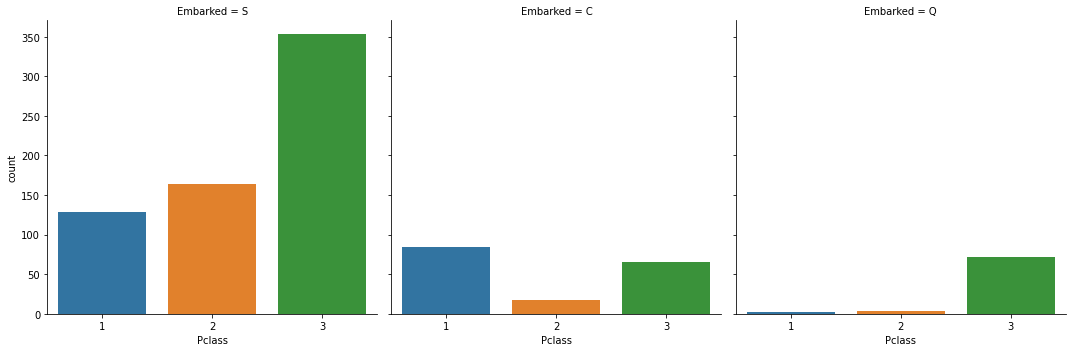

In [159]:
# visualizing passenger class by point embarked
sns.catplot('Pclass', col = 'Embarked', data = train, kind = 'count')

## higher chance of survival from Cherbourg because:
### Cherbourg had more first class passengers (saved first)
### Southampton had more third class passengers 
### majority of people onboard embarked from Southampton

# Prepping data for Modeling

### Combining training and test set for easier manipulation

In [160]:
combine = pd.concat([train, test], axis = 0).reset_index(drop = True)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [161]:
# null values in the combined dataset
combine.isnull().sum().sort_values(ascending = False)
## test set does not have a 'Survived' column
## 418 null values shown in 'Survived' are from test set

Survived       418
Age            263
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [162]:
# convert Sex into numerical values where 0 = male and 1 = female
combine['Sex'] = combine['Sex'].map({'male': 0, 'female': 1})

In [163]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


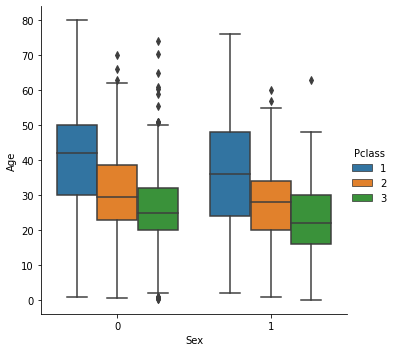

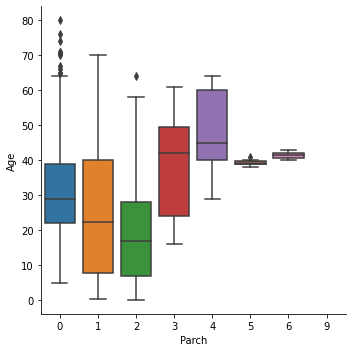

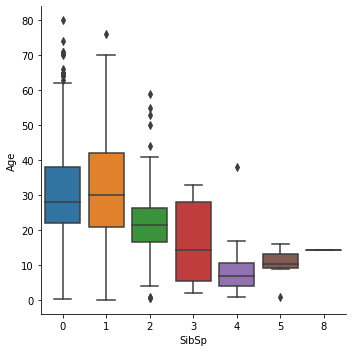

In [164]:
sns.factorplot(y = 'Age', x = 'Sex', hue = 'Pclass', kind = 'box', data = combine)
sns.factorplot(y = 'Age', x = 'Parch', kind = 'box', data = combine)
sns.factorplot(y = 'Age', x = 'SibSp', kind = 'box', data = combine)

<AxesSubplot:>

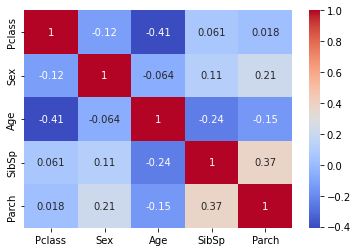

In [165]:
# fill null values in age with correlated feature values
sns.heatmap(combine.drop(['Survived', 'Name', 'PassengerId', 'Fare'], axis = 1).corr(), annot = True, cmap = 'coolwarm')

In [166]:
# Sex has the lowest correlation to Age relative to Pclass, SibSp, and Parch
# null values in Age
age_nan_indices = list(combine[combine['Age'].isnull()].index)
len(age_nan_indices)

263

In [167]:
# loop through list and impute null values in Age

for index in age_nan_indices:
    median_age = combine['Age'].median()
    predict_age = combine['Age'][(combine['SibSp'] == combine.iloc[index]['SibSp']) 
                                 & (combine['Parch'] == combine.iloc[index]['Parch'])
                                 & (combine['Pclass'] == combine.iloc[index]["Pclass"])].median()
    if np.isnan(predict_age):
        combine['Age'].iloc[index] = median_age
    else:
        combine['Age'].iloc[index] = predict_age

In [168]:
# double check null values in Age
combine.isnull().sum().sort_values(ascending = False)
## null values in Survived from test set before combining

Survived       418
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

# Feature Engineering

In [169]:
# engineering features to use in predictive modeling

# 1. using name to get title of passengers
example = train.Name[1]
example

'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'

In [170]:
# function to split name and get title
def get_title(var):
    """
    function takes the name and returns the title of the people. 
    """
    title = var.split(',')[1]
    title2 = title.split('.')[0]
    return title2[1:]

In [171]:
# create the title colmun
combine['Title'] = combine.apply(lambda x: get_title(x.Name), axis = 1)

In [172]:
# list of titles with count of values
print(combine.groupby('Title').count().sort_values(by='Survived', ascending=False)['Pclass'])

Title
Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Major             2
Col               4
Mlle              2
Sir               1
Ms                2
Capt              1
Mme               1
Lady              1
Jonkheer          1
Don               1
the Countess      1
Dona              1
Name: Pclass, dtype: int64


In [173]:
# combining unique titles into one category
combine['Title'] = combine['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona'], 'Other')
combine['Title'] = combine['Title'].replace(['Mlle', 'Ms'], 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')

<AxesSubplot:xlabel='Title', ylabel='count'>

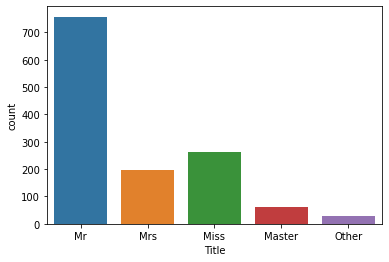

In [174]:
# visualization of titles
sns.countplot(combine['Title'])

In [175]:
# sorting title by sex to double check accuracy (male = mr, female = mrs)
print(combine.groupby(['Sex', 'Title']).count().Pclass)

Sex  Title 
0    Master     61
     Mr        757
     Other      25
1    Miss      264
     Mrs       198
     Other       4
Name: Pclass, dtype: int64


In [176]:
# mean of survival by name title
combine[['Title', 'Survived']].groupby(['Title'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Other,0.347826
2,Mr,0.156673


Text(0.5, 1.0, 'Average Survival by Title')

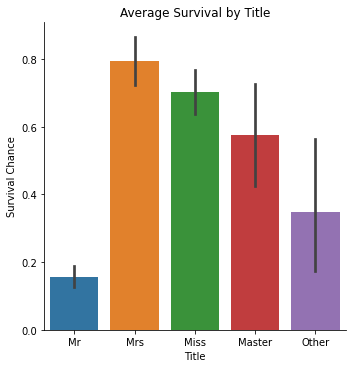

In [177]:
# visualizaing average survival chance by title
sns.factorplot(x = 'Title', y = 'Survived', data = combine, kind = 'bar')
plt.ylabel('Survival Chance')
plt.title('Average Survival by Title')
## graph supports hypothesis that women and children may have been saved first
## majority of passengers hold the title mr but show to have the lowest chance of survival

In [178]:
# drop name column
combine = combine.drop('Name', axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,0,22.0,1,0,7.2500,S,Mr
1,2,1.0,1,1,38.0,1,0,71.2833,C,Mrs
2,3,1.0,3,1,26.0,0,0,7.9250,S,Miss
3,4,1.0,1,1,35.0,1,0,53.1000,S,Mrs
4,5,0.0,3,0,35.0,0,0,8.0500,S,Mr


In [179]:
# 2. calculate family size from SibSp and Parch to determine who traveled alone
combine['FamilySize'] = combine['SibSp'] + combine['Parch'] + 1
combine[['SibSp', 'Parch', 'FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [180]:
# average of survival by family size
combine[['FamilySize', 'Survived']].groupby('FamilySize', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [181]:
# create traveledalone feature - train
combine['traveledalone'] = 0
combine.loc[combine['FamilySize'] == 1, 'traveledalone'] = 1

In [182]:
# average of survival by traveledalone
combine[['traveledalone', 'Survived']].groupby('traveledalone', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,traveledalone,Survived
0,0,0.505650
1,1,0.303538


In [183]:
# drop sibling/spouse, parent/child, familysize and only show traveledalone
combine = combine.drop(['SibSp', 'Parch', 'FamilySize'], axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,traveledalone
0,1,0.0,3,0,22.0,7.2500,S,Mr,0
1,2,1.0,1,1,38.0,71.2833,C,Mrs,0
2,3,1.0,3,1,26.0,7.9250,S,Miss,1
3,4,1.0,1,1,35.0,53.1000,S,Mrs,0
4,5,0.0,3,0,35.0,8.0500,S,Mr,1


In [184]:
# 3. create age bands, age*class column, and fare bands
## compute mean of survival by age bands
combine['AgeBand'] = pd.cut(combine['Age'], 5)
combine[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by = 'AgeBand')

,AgeBand,Survived
0,"(0.0902, 16.136]",0.500000
1,"(16.136, 32.102]",0.341719
2,"(32.102, 48.068]",0.412844
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


In [185]:
# assign ordinals to each age band
combine.loc[combine['Age'] <= 16.136, 'Age'] = 0
combine.loc[(combine['Age'] > 16.136) & (combine['Age'] <= 32.102), 'Age'] = 1
combine.loc[(combine['Age'] > 32.102) & (combine['Age'] <= 48.068), 'Age'] = 2
combine.loc[(combine['Age'] > 48.068) & (combine['Age'] <= 64.034), 'Age'] = 3
combine.loc[combine['Age'] > 64.034 , 'Age'] = 4

In [186]:
# drop age band feature
combine = combine.drop('AgeBand', axis = 1)

In [187]:
# Age and Pclass data types - train
combine[['Age', 'Pclass']].dtypes

Age       float64
Pclass      int64
dtype: object

In [188]:
# convert ordinal Age into integer
combine['Age'] = combine['Age'].astype('int')
combine['Age'].dtype

dtype('int64')

In [189]:
# create Age*Class feature
combine['Age*Class'] = combine['Age'] * combine['Pclass']
combine[['Age', 'Pclass', 'Age*Class']].head()

,Age,Pclass,Age*Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


In [190]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,traveledalone,Age*Class
0,1,0.0,3,0,1,7.2500,S,Mr,0,3
1,2,1.0,1,1,2,71.2833,C,Mrs,0,2
2,3,1.0,3,1,1,7.9250,S,Miss,1,3
3,4,1.0,1,1,2,53.1000,S,Mrs,0,2
4,5,0.0,3,0,2,8.0500,S,Mr,1,6


In [191]:
# divide Fare into four bands
combine['FareBand'] = pd.cut(combine['Fare'], 4)
combine[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by = 'FareBand')

,FareBand,Survived
0,"(-0.512, 128.082]",0.368113
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


In [192]:
# assign ordinal to each Fare band
combine.loc[combine['Fare'] <= 1.56, 'Fare'] = 0
combine.loc[(combine['Fare'] > 1.56) & (combine['Fare'] <= 3.119), 'Fare'] = 1
combine.loc[(combine['Fare'] > 3.119) & (combine['Fare'] <= 4.679), 'Fare'] = 2
combine.loc[combine['Fare'] > 4.679, 'Fare'] = 3

In [193]:
# convert Fare into integer
combine['Fare'] = combine['Fare'].astype('int')

In [194]:
# drop Fare band feature
combine = combine.drop('FareBand', axis = 1)

In [195]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,traveledalone,Age*Class
0,1,0.0,3,0,1,3,S,Mr,0,3
1,2,1.0,1,1,2,3,C,Mrs,0,2
2,3,1.0,3,1,1,3,S,Miss,1,3
3,4,1.0,1,1,2,3,S,Mrs,0,2
4,5,0.0,3,0,2,3,S,Mr,1,6


In [196]:
# 4. encode Title and Embarked features
combine = pd.get_dummies(combine, columns = ['Title'])
combine = pd.get_dummies(combine, columns = ['Embarked'], prefix = 'Em')
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,traveledalone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,3,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,3,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,3,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,3,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,3,1,6,0,0,1,0,0,0,0,1


### Separating training and test set from combined df

In [197]:
train = combine[:len(train)]
test = combine[len(train):]

In [198]:
# training set
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,traveledalone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,3,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,3,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,3,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,3,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,3,1,6,0,0,1,0,0,0,0,1


In [199]:
# drop PassengerId from and train set
train = train.drop('PassengerId', axis = 1)
train.head()

,Survived,Pclass,Sex,Age,Fare,traveledalone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Em_C,Em_Q,Em_S
0,0.0,3,0,1,3,0,3,0,0,1,0,0,0,0,1
1,1.0,1,1,2,3,0,2,0,0,0,1,0,1,0,0
2,1.0,3,1,1,3,1,3,0,1,0,0,0,0,0,1
3,1.0,1,1,2,3,0,2,0,0,0,1,0,0,0,1
4,0.0,3,0,2,3,1,6,0,0,1,0,0,0,0,1


In [200]:
# convert survived to integer
train['Survived'] = train['Survived'].astype('int')
train.head()

,Survived,Pclass,Sex,Age,Fare,traveledalone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Em_C,Em_Q,Em_S
0,0,3,0,1,3,0,3,0,0,1,0,0,0,0,1
1,1,1,1,2,3,0,2,0,0,0,1,0,1,0,0
2,1,3,1,1,3,1,3,0,1,0,0,0,0,0,1
3,1,1,1,2,3,0,2,0,0,0,1,0,0,0,1
4,0,3,0,2,3,1,6,0,0,1,0,0,0,0,1


In [201]:
# test set
test.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,traveledalone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Em_C,Em_Q,Em_S
891,892,NaN,3,0,2,3,1,6,0,0,1,0,0,0,1,0
892,893,NaN,3,1,2,3,0,6,0,0,0,1,0,0,0,1
893,894,NaN,2,0,3,3,1,6,0,0,1,0,0,0,1,0
894,895,NaN,3,0,1,3,1,3,0,0,1,0,0,0,0,1
895,896,NaN,3,1,1,3,0,3,0,0,0,1,0,0,0,1


In [202]:
# drop Survived from and test set
test = test.drop('Survived', axis = 1)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,traveledalone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Em_C,Em_Q,Em_S
891,892,3,0,2,3,1,6,0,0,1,0,0,0,1,0
892,893,3,1,2,3,0,6,0,0,0,1,0,0,0,1
893,894,2,0,3,3,1,6,0,0,1,0,0,0,1,0
894,895,3,0,1,3,1,3,0,0,1,0,0,0,0,1
895,896,3,1,1,3,0,3,0,0,0,1,0,0,0,1


# Modeling

In [203]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()

X_train.shape, Y_train.shape, X_test.shape

((891, 14), (891,), (418, 14))

In [204]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.7

In [205]:
# RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

84.29

In [206]:
# Gradient Boosting
gradient_booster = GradientBoostingClassifier()
gradient_booster.fit(X_train, Y_train)
Y_pred = gradient_booster.predict(X_test)
gradient_booster.score(X_train, Y_train)
acc_gradient_booster = round(gradient_booster.score(X_train, Y_train) * 100, 2)
acc_gradient_booster

83.73

In [207]:
# SVM (Support Vector Machines)

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

81.14

In [208]:
# GaussianNB (Gaussian Naive Bayes)

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.35

In [209]:
# DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

84.29

In [210]:
# KNN (K Nearest Neighbors)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.39

In [211]:
# LinearSVC (Support Vector Classification)

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

80.36

In [212]:
# SGDClassifier (Stochastic Gradient Descent)

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

74.52

In [213]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

75.76

# Model Evaluation and Cross Validation

In [214]:
# summary of models and scores
models = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 
                                 'Support Vector Machines', 'Gausian Naive Bayes', 'Decision Tree', 
                                 'KNN', 'Linear SVC', 'Stochastic Gradient Descent', 'Perceptron'],
                       'Score': [acc_log, acc_random_forest, acc_gradient_booster, acc_svc, acc_gaussian, 
                                 acc_decision_tree, acc_knn, acc_linear_svc, acc_sgd, acc_perceptron]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Random Forest,84.29
1,Decision Tree,84.29
2,Gradient Boosting,83.73
3,KNN,83.39
4,Support Vector Machines,81.14
5,Logistic Regression,80.70
6,Linear SVC,80.36
7,Gausian Naive Bayes,79.35
8,Perceptron,75.76
9,Stochastic Gradient Descent,74.52


In [215]:
# create a list containing classifiers 
classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(RandomForestClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(SVC())
classifiers.append(GaussianNB())
classifiers.append(DecisionTreeClassifier())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(Perceptron())

len(classifiers)

10

In [216]:
# create a list which contains cross validation results for each classifier
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy', cv = 10))

In [217]:
# mean and standard deviation of cross validation results for each classifier  
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [218]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 
                                                                                                       'Support Vector Machines', 'Gausian Naive Bayes', 'Decision Tree', 
                                                                                                       'KNN', 'Linear SVC', 'Stochastic Gradient Descent', 'Perceptron']})

cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.817066,0.033306,Gradient Boosting
1,0.813708,0.033685,KNN
2,0.804744,0.027359,Linear SVC
3,0.803608,0.027038,Logistic Regression
4,0.801386,0.034560,Random Forest
5,0.796891,0.031700,Decision Tree
6,0.795755,0.039381,Support Vector Machines
7,0.757653,0.047205,Stochastic Gradient Descent
8,0.755331,0.116527,Gausian Naive Bayes
9,0.694694,0.112185,Perceptron


Text(0.5, 1.0, 'Cross Validation Scores')

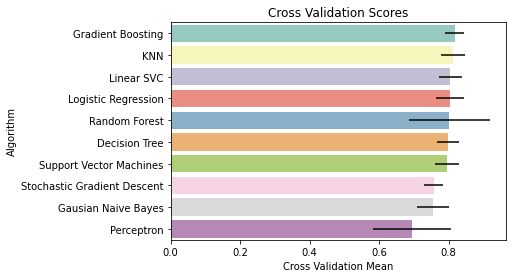

In [219]:
# visualization of models that performed best in regards to cross validation
sns.barplot('Cross Validation Mean', 'Algorithm', data = cv_res, order = cv_res.sort_values(by = 'Cross Validation Mean', ascending = False)['Algorithm'], palette = 'Set3', **{'xerr': cv_std})
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')

# Hyperparameter Tuning

In [220]:
# Gradient Boosting was the top score in cross validation
## we will use Gradient Boosting for hyperparameter tuning

# define parameters for gradient boosting
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [221]:
# use GridSearchCV for cross-validation
cv = GridSearchCV(gbc,parameters,cv=5)
cv.fit(X_train, Y_train.values.ravel())

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]})

In [222]:
# finding the best parameters for the gbc algorithms
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [223]:
# displaying the best parameters for gbc
display(cv)

Best parameters are: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}


0.616 + or -0.002 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.787 + or -0.019 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.787 + or -0.012 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.795 + or -0.02 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.616 + or -0.002 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.806 + or -0.024 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.823 + or -0.017 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.817 + or -0.022 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.616 + or -0.002 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.803 + or -0.022 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.815 + or -0.024 for the {'learning_rate': 0.01, 'max_d

In [225]:
# survival predictions
Y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [228]:
len(Y_pred)

418

# Submission

In [229]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [231]:
ss.shape

(418, 2)

In [232]:
# create submission dataframe
submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})
submit.head()

,PassengerId,Survived
891,892,0
892,893,1
893,894,0
894,895,0
895,896,1


In [233]:
submit.shape

(418, 2)

In [239]:
# submission fits shape of ss
# create and save csv file

submit.to_csv('submission.csv', index = False)